In [1]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Dopant_Data.csv')

# get data
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [3]:
#Step-1
X_meaned = StandardScaler().fit_transform(X)

#Step-2
cov_mat = np.cov(X_meaned , rowvar = False)

#Step-3
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

#Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index] # sort eigenvectors -> most important on top (pc1, pc2)
sorted_eigenvectors = eigen_vectors[:,sorted_index] # match eigenvalues to eigenvectors

#Step-5
eigenvector_subset = sorted_eigenvectors[:,0:2]

#Step-6
X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

sort_idx = np.argsort(abs(sorted_eigenvectors))[::-1] # sort by most important features
for line in sort_idx:
    print(*line)

25 24 28 26 27 23 4 0 11 2 22 21 8 7 12 14 15 5 9 3 18 16 19 6 17 1 20 10 13
24 25 28 26 27 23 17 21 22 10 14 15 19 0 8 16 9 20 3 2 1 13 18 11 6 7 5 4 12
27 28 25 26 23 24 14 4 22 15 18 16 12 9 10 8 5 17 0 1 7 3 11 13 6 19 20 2 21
24 25 28 26 27 23 4 16 20 9 10 22 8 5 0 17 7 18 15 1 12 11 3 13 6 14 19 2 21
25 24 28 26 27 23 21 17 4 14 0 22 11 9 8 5 12 7 6 19 3 15 20 13 2 16 1 10 18
25 24 28 26 27 23 15 16 4 13 11 9 3 14 6 5 1 8 7 2 12 17 19 10 21 0 18 22 20
26 25 24 27 28 10 3 4 17 14 21 15 23 12 11 9 5 6 18 0 8 7 19 2 13 22 1 20 16
23 22 21 19 20 16 18 15 17 11 26 24 1 10 27 14 2 8 9 25 0 12 3 13 7 4 6 5 28
23 22 19 21 20 17 7 26 18 24 15 14 3 27 0 16 25 2 11 1 10 13 12 6 4 28 5 9 8
24 25 28 26 27 23 21 22 4 13 20 3 2 7 12 19 9 14 1 15 8 0 18 6 5 11 17 10 16
25 24 28 26 27 23 16 17 11 3 9 21 14 6 5 13 4 12 10 7 8 0 2 18 20 15 1 22 19
23 22 28 21 13 19 16 7 0 20 14 4 27 25 24 8 2 12 10 1 3 17 6 15 11 18 26 5 9
23 22 28 16 19 21 10 2 11 12 6 17 5 20 3 1 13 14 15 7 4 9 27 25 24 18 0 8 26

In [4]:
from sklearn.decomposition import PCA

list_numerical = X.columns

pca = PCA(n_components = 2)

X = StandardScaler().fit_transform(X)

principal_comp = pca.fit_transform(X)

principal_df = pd.DataFrame(data = principal_comp, columns = ['principal component 1', 'principal component 2'])

final_df = pd.concat([principal_df, y], axis = 1)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.25252832, 0.16406606])

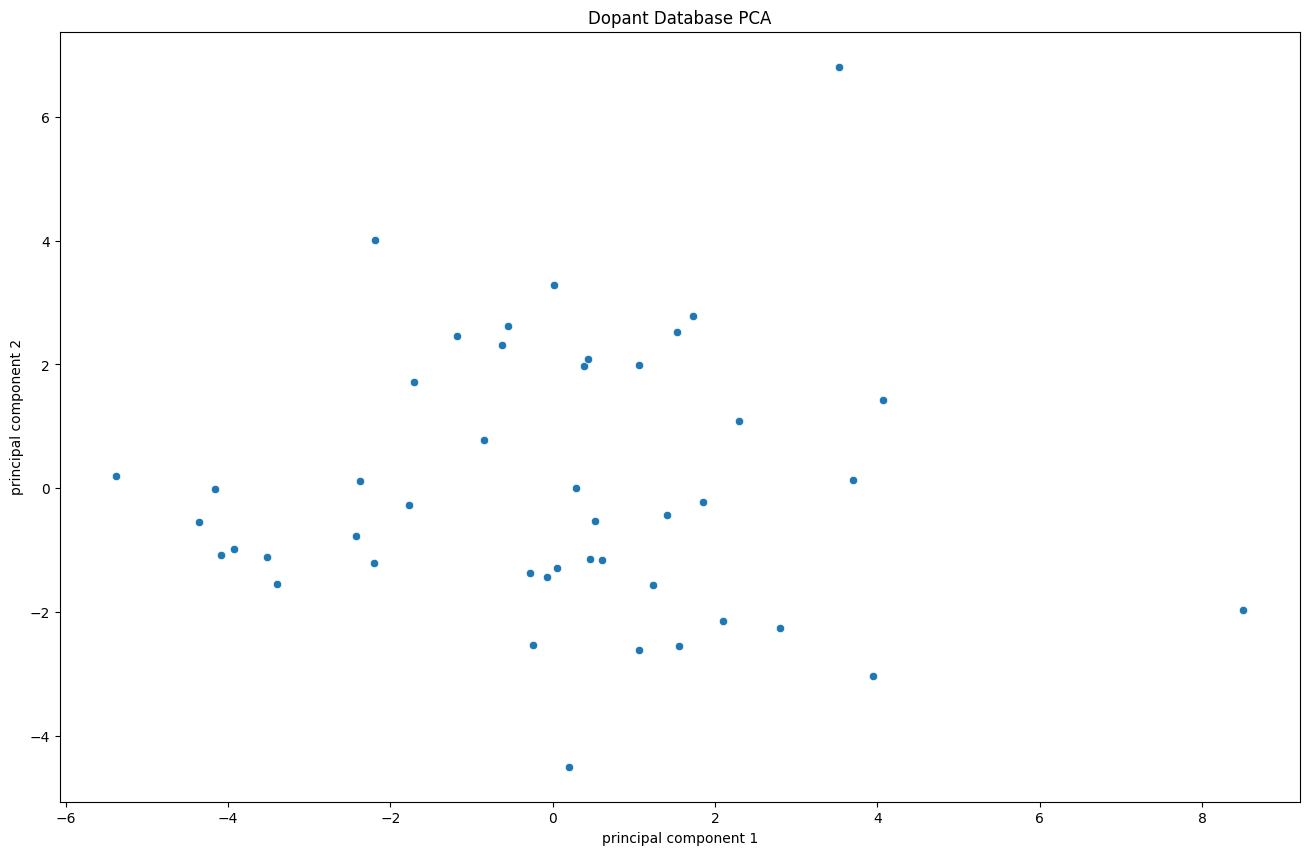

In [9]:
import seaborn as sns

plt.figure(figsize=(16,10))
g = sns.scatterplot(
    x="principal component 1", y="principal component 2", data = final_df
)
plt.title('Dopant Dataset PCA')
plt.savefig('DDataPCA.png', dpi=800)